# goldpriceprediction

Use the "Run" button to execute the code.

In [1]:
#jovian commit essentials

!pip install jovian --upgrade -q
import jovian
jovian.set_project('goldpriceprediction')
jovian.set_colab_id('1XasLKurV5iF78BqZI4_QRBSuVYvfqLRa')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data'

od.download(dataset_url)
#username = {wahustacyanne}
#password = {f88d51e14846b2cb95ebf1daf6ff9e9d}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: wahustacyanne
Your Kaggle Key: ··········


100%|██████████| 41.9k/41.9k [00:00<00:00, 2.30MB/s]

Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [5]:
# loading csv data to a pandas dataframe
gold_data = pd.read_csv('/content/gold-price-data/gld_price_data.csv')

In [6]:
 # print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
# getting some basic information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
 # checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

In [12]:
correlation = gold_data.corr()

<ipython-input-12-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

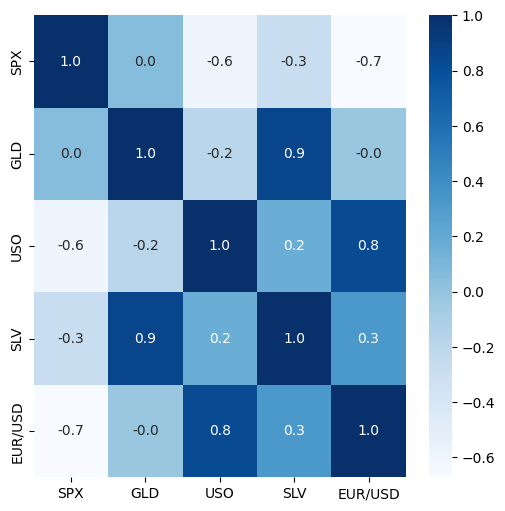

In [13]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (6,6))
sns.heatmap(correlation,cmap='Blues',fmt='.1f',annot=True)

In [14]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-15-b94eac2e88dd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

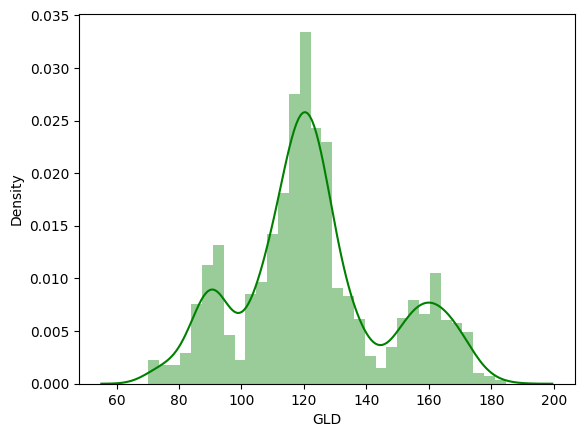

In [15]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [22]:
first_column_header = gold_data.columns[0]
first_column_header

'Date'

In [25]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [26]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [27]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Testing Data

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Model Training: RandomForestRegressor

In [31]:
regressor = RandomForestRegressor(n_estimators=100)

In [32]:
# training the model
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation

In [33]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [34]:
print(test_data_prediction)

[168.69089923  81.78760001 116.24260016 127.7033008  120.57950104
 154.78329788 150.51189903 126.0052001  117.69639882 125.97550094
 116.44820118 171.9737007  142.04279757 167.85449812 115.0971
 118.26940058 138.09040252 170.33060166 160.08780317 160.70749976
 155.23670056 125.03370025 176.10989937 157.57260332 125.23790021
  94.00379958  77.50510036 120.46949999 119.10289949 167.44609997
  88.24000006 125.38930049  91.03660083 117.70790014 121.12229916
 136.28120045 115.51830133 114.98960081 146.0996996  106.96760099
 104.68170263  87.25309793 126.58570043 117.7332004  153.06279896
 119.59949976 108.33189971 107.98679833  93.21980048 127.1231975
  75.05740039 113.74119913 121.29010013 111.29559898 118.87029907
 120.9516993  159.78120094 167.06610136 147.04819638  86.00059894
  94.27860053  86.84579878  90.46940015 118.92620107 126.39820075
 127.52039975 170.44060008 122.26519918 117.37069855  98.6939002
 168.34650225 142.81809884 132.16510245 121.25860195 121.12169962
 119.75440089 11

In [36]:
# R Squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9901792154113673


Compare the Actual values and Predicted values in a plot

In [37]:
y_test = list(y_test)

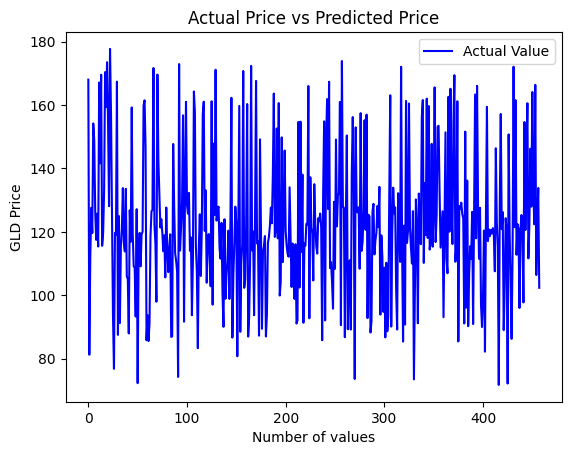

In [38]:
plt.plot(y_test, color = 'blue',label= 'Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()